**AI Week 1: Exercise 1**


---


Aditi Desai

200968126

MetaData:

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt

from imgaug import augmenters
from random import randint

from tensorflow import keras
from tensorflow.keras import layers,losses
from tensorflow.keras.layers import Flatten,Dense, Input, Conv2D,MaxPool2D, UpSampling2D
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal

Train the  model  using  x_trainas both the  input and the  target.  The  encoder shouldlearn  to  compress  the  dataset  from  784  dimensions  to  the  latent  space,  and  the decoder should learn to reconstruct the original images.

Let theautoencoder have two Dense layers: a.an encoder, which compresses the images into a 64 dimensional latent vector, use reLU as activation function.b.and a decoder, that reconstructs the original image from the latent space, use sigmoid as activation function.

Using x_train as both input and target

In [15]:
train = pd.read_csv("/content/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

## normalize and reshape the predictors  
train_x = train_x / 255

## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

train_x.shape

(48000, 784)

In [19]:
## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(64, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='sigmoid')(latent_view)
decode_layer2 = Dense(1000, activation='sigmoid')(decode_layer1)
decode_layer3 = Dense(1500, activation='sigmoid')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)


model.summary()
     

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 1500)              1177500   
                                                                 
 dense_25 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_26 (Dense)            (None, 500)               500500    
                                                                 
 dense_27 (Dense)            (None, 64)                32064     
                                                                 
 dense_28 (Dense)            (None, 500)               32500     
                                                                 
 dense_29 (Dense)            (None, 1000)              5010

In [20]:
model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, 
                               patience=10, verbose=1, mode='auto')

model.fit(train_x, train_x, epochs=10, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/10
24/24 [==============================] - 40s 2s/step - loss: 0.1421 - val_loss: 0.0894
Epoch 2/10
24/24 [==============================] - 37s 2s/step - loss: 0.0859 - val_loss: 0.0805
Epoch 3/10
24/24 [==============================] - 40s 2s/step - loss: 0.0748 - val_loss: 0.0694
Epoch 4/10
24/24 [==============================] - 37s 2s/step - loss: 0.0669 - val_loss: 0.0646
Epoch 5/10
24/24 [==============================] - 40s 2s/step - loss: 0.0639 - val_loss: 0.0628
Epoch 6/10
24/24 [==============================] - 39s 2s/step - loss: 0.0627 - val_loss: 0.0620
Epoch 7/10
24/24 [==============================] - 52s 2s/step - loss: 0.0617 - val_loss: 0.0614
Epoch 8/10
24/24 [==============================] - 39s 2s/step - loss: 0.0611 - val_loss: 0.0605
Epoch 9/10
24/24 [==============================] - 39s 2s/step - loss: 0.0593 - val_loss: 0.0548
Epoch 10/10
24/24 [==============================] - 44s 2s/step - loss: 0.0502 - val_loss: 0.0471


Once the model is trained for at least 10 epochs , with loss function as mean square error, test it by encoding and decoding images from the test set. Display original and reconstructed images.

Using test set for encoding and decoding

In [21]:
test = pd.read_csv("/content/fashion-mnist_test.csv")
test_x = test[list(train.columns)[1:]].values
test_y = test['label'].values

## normalize and reshape the predictors  
test_x = test_x / 255

test_x.shape

(10000, 784)

In [22]:
preds = model.predict(test_x)

313/313 [==============================] - 5s 16ms/step


Display original and reconstructed images.

Inputs: Actual Images

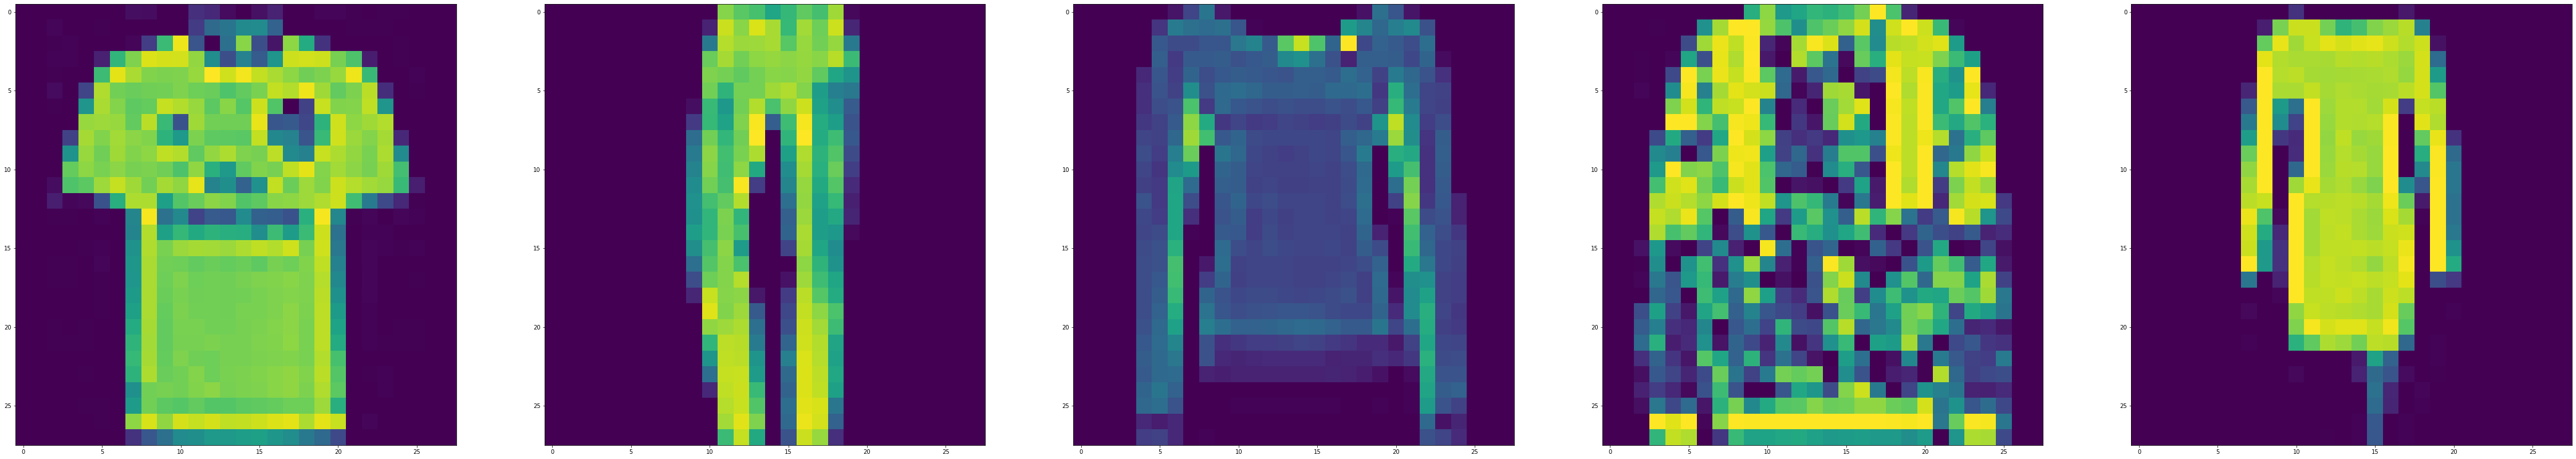

In [23]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(test_x[i].reshape(28, 28))
plt.show()

Predicted : Autoencoder Output

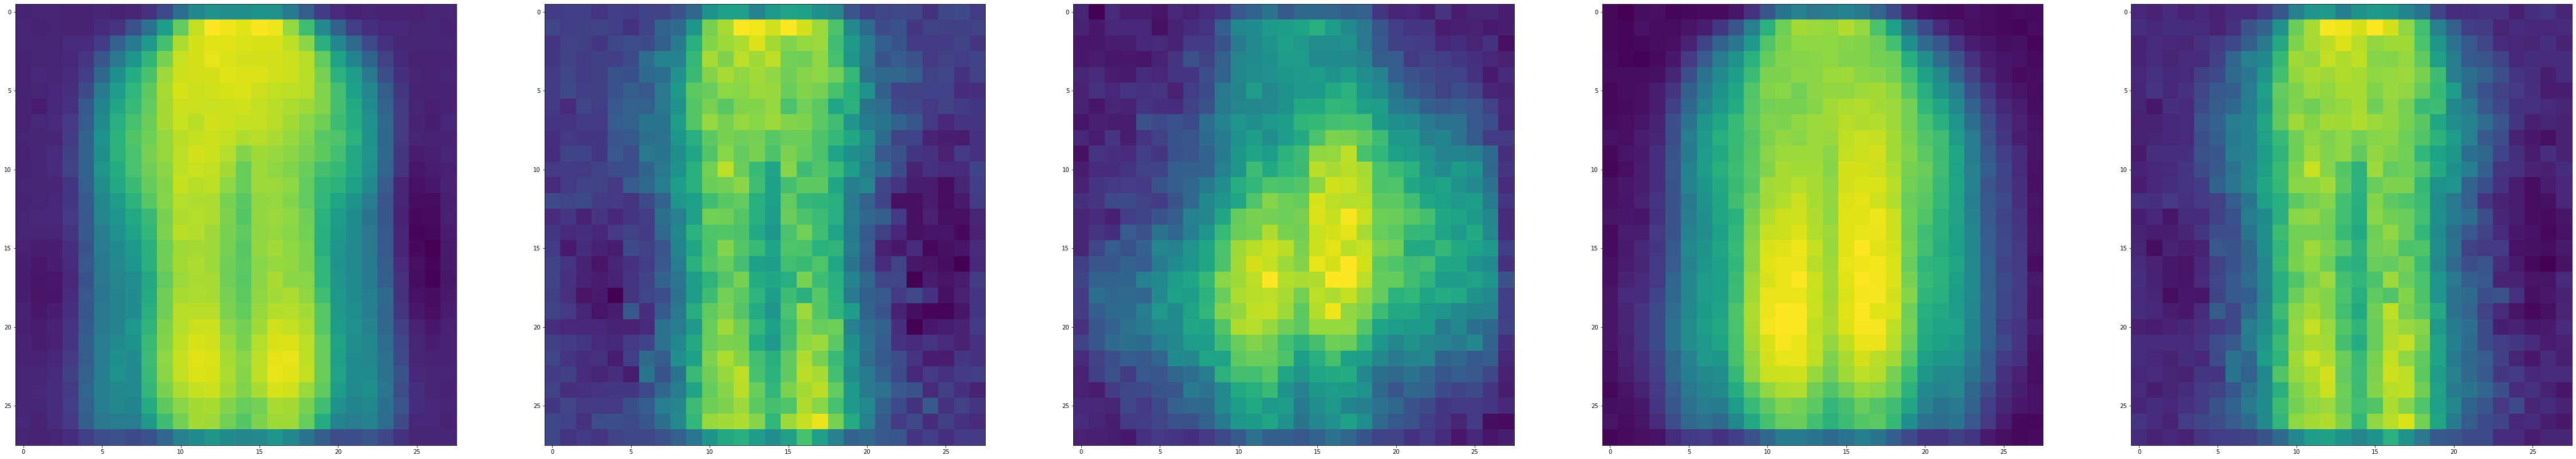

In [24]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()